In [7]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('means_and_covariances.csv', header=None)

# Extract states, means, standard deviations, electoral votes, and correlation matrix
states = data.iloc[1, 1:].tolist()
means = data.iloc[2, 1:].astype(float).tolist()
stdevs = data.iloc[3, 1:].astype(float).tolist()
electoral_votes = data.iloc[4, 1:].astype(int).tolist()
correlation_matrix = data.iloc[7:58, 1:52].apply(pd.to_numeric).values

# Verify the extracted data
print("States:", states)
print("Means:", means)
print("Standard Deviations:", stdevs)
print("Electoral Votes:", electoral_votes)
print("Correlation Matrix:\n", correlation_matrix)


States: ['AK', 'ID', 'KS', 'MT', 'ND', 'NE', 'OK', 'SD', 'TX', 'UT', 'WY', 'CA', 'HI', 'NM', 'OR', 'WA', 'AL', 'GA', 'IN', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'AR', 'IA', 'MO', 'IL', 'MI', 'MN', 'OH', 'PA', 'WI', 'CT', 'DC', 'DE', 'MA', 'MD', 'ME', 'NH', 'NJ', 'NY', 'RI', 'VT', 'AZ', 'CO', 'FL', 'NV']
Means: [7.4, 19.6, 12.5, 15.0, 23.1, 17.8, 26.0, 15.5, 8.6, 10.5, 35.0, -22.9, -23.7, -5.8, -9.2, -13.3, 22.3, 4.0, 11.6, 18.2, 16.1, 13.1, -0.7, 7.0, 12.0, -5.6, 26.5, 20.7, 2.9, 10.1, -12.9, -4.2, -5.8, 1.9, -3.7, -5.3, -12.7, -70.5, -12.5, -23.4, -25.7, -7.23333, -3.6, -11.5, -19.0, -14.4, -27.4, 2.2, -4.0, -0.7, -1.2]
Standard Deviations: [11.0, 7.2, 6.5, 8.4, 10.4, 11.3, 6.2, 10.0, 5.7, 6.1, 11.6, 5.8, 9.5, 6.7, 6.6, 6.4, 5.9, 5.5, 5.9, 6.2, 5.9, 6.5, 5.8, 5.8, 6.1, 5.8, 7.5, 6.8, 6.3, 5.9, 6.0, 5.8, 6.3, 5.8, 5.5, 6.1, 6.9, 6.8, 9.4, 6.5, 5.8, 10.0, 7.7, 6.3, 5.9, 9.5, 11.2, 6.1, 6.1, 5.8, 6.7]
Electoral Votes: [3, 4, 6, 3, 3, 5, 7, 3, 38, 6, 3, 55, 4, 5, 7, 12, 9, 16, 1

In [8]:


# Convert to covariance matrix
cov_matrix = np.outer(stdevs, stdevs) * correlation_matrix

In [9]:
# Simulate multivariate normal distribution for election outcomes
num_simulations = 2000
simulated_margins = np.random.multivariate_normal(means, cov_matrix, num_simulations)

In [16]:
# Calculate electoral votes based on margins
red_wins = (simulated_margins > 0).astype(int)
blue_wins = 1 - red_wins

red_electoral_votes = np.dot(red_wins, electoral_votes)
blue_electoral_votes = np.dot(blue_wins, electoral_votes)

# Probability of winning calculation
red_win_prob = np.mean(red_electoral_votes >= 270) + 0.5 * np.mean(red_electoral_votes == 269)
blue_win_prob = 1 - red_win_prob



In [13]:
red_win_prob

0.266

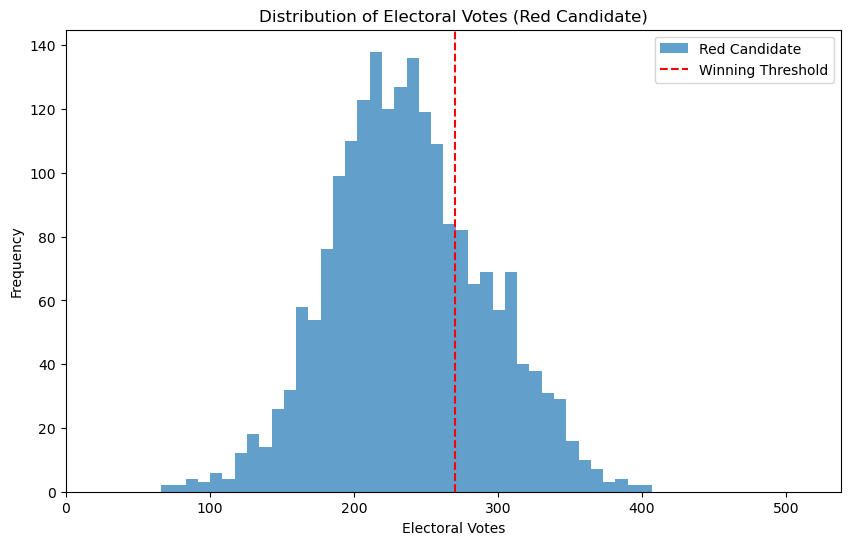

In [26]:
# Generate histogram for Figure 5.12
plt.figure(figsize=(10, 6))
plt.hist(red_electoral_votes, bins=40, alpha=0.7, label='Red Candidate')
plt.axvline(x=270, color='red', linestyle='--', label='Winning Threshold')
plt.xlabel('Electoral Votes')
plt.ylabel('Frequency')
plt.xlim(0, 538)  # Set x-axis limits
plt.title('Distribution of Electoral Votes (Red Candidate)')
plt.legend()
plt.show()

In [18]:
# Generate bar plot for Figure 5.13 (Ignoring the effects of uncertainty)
expected_red_electoral_votes = sum([ev if margin > 0 else 0 for ev, margin in zip(electoral_votes, means)])
expected_blue_electoral_votes = sum([ev if margin <= 0 else 0 for ev, margin in zip(electoral_votes, means)])

In [23]:
print("Point forecast of expected red electoral votes:",expected_red_electoral_votes)
print("Point forecast of expected red electoral votes:", expected_blue_electoral_votes)

Point forecast of expected red electoral votes: 215
Point forecast of expected red electoral votes: 323


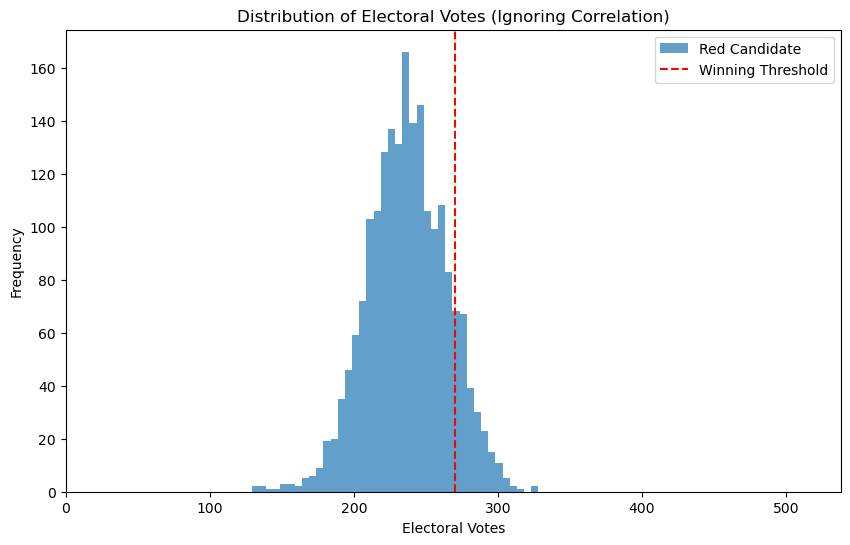

Probability of Red Candidate winning (with correlation): 0.27
Probability of Blue Candidate winning (with correlation): 0.73
Probability of Red Candidate winning (ignoring correlation): 0.13
Probability of Blue Candidate winning (ignoring correlation): 0.87


In [27]:
# Generate histogram for Figure 5.14 (Ignoring the effects of correlation)
uncorrelated_cov_matrix = np.diag(np.diag(cov_matrix))
uncorrelated_simulated_margins = np.random.multivariate_normal(means, uncorrelated_cov_matrix, num_simulations)

uncorrelated_red_wins = (uncorrelated_simulated_margins > 0).astype(int)
uncorrelated_blue_wins = 1 - uncorrelated_red_wins

uncorrelated_red_electoral_votes = np.dot(uncorrelated_red_wins, electoral_votes)
uncorrelated_blue_electoral_votes = np.dot(uncorrelated_blue_wins, electoral_votes)

uncorrelated_red_win_prob = np.mean(uncorrelated_red_electoral_votes >= 270) + 0.5 * np.mean(uncorrelated_red_electoral_votes == 269) 
uncorrelated_blue_win_prob = 1 - uncorrelated_red_win_prob

plt.figure(figsize=(10, 6))
plt.hist(uncorrelated_red_electoral_votes, bins=40, alpha=0.7, label='Red Candidate')
plt.axvline(x=270, color='red', linestyle='--', label='Winning Threshold')
plt.xlabel('Electoral Votes')
plt.xlim(0, 538)  # Set x-axis limits
plt.ylabel('Frequency')
plt.title('Distribution of Electoral Votes (Ignoring Correlation)')
plt.legend()
plt.show()

# Display probabilities
print(f"Probability of Red Candidate winning (with correlation): {red_win_prob:.2f}")
print(f"Probability of Blue Candidate winning (with correlation): {blue_win_prob:.2f}")
print(f"Probability of Red Candidate winning (ignoring correlation): {uncorrelated_red_win_prob:.2f}")
print(f"Probability of Blue Candidate winning (ignoring correlation): {uncorrelated_blue_win_prob:.2f}")